In [130]:
import numpy as np

import torch
from torch import nn

import matplotlib.pyplot as plt

In [131]:
input = torch.tensor([[0, 0], [0, 0.5], [0, 1],
                      [0.5, 0], [0.5, 0.5], [0.5, 1],
                      [1, 0], [1, 0.5], [1, 1]])

expected = torch.tensor([0, 0, 0,
                         0, 0, 1,
                         0, 1, 1]).reshape(9, 1).to(torch.float32)

In [132]:
vals = np.linspace(-1.0, 4.0, 26)
coords = np.array([[x, y] for x in vals for y in vals])

In [133]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [134]:
loss_fn = nn.L1Loss()

def train_loop(optimizer):
    # Compute prediction and loss
    pred = model(input)
    loss = loss_fn(pred, expected)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"loss: {loss.item():>7f}")

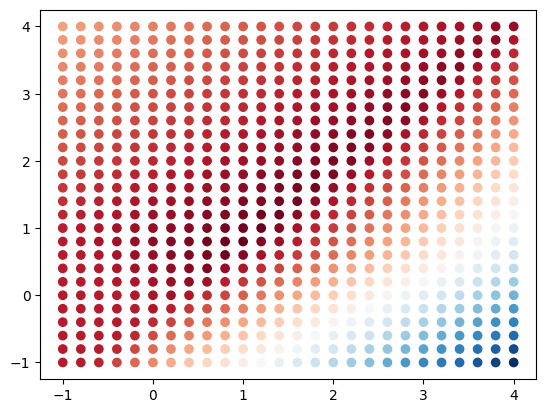

In [135]:
pred = model(torch.tensor(coords).to(torch.float32)).flatten().detach().numpy()
plt.scatter(coords[:, 0], coords[:, 1], c = pred, cmap='RdBu_r')
plt.show()

In [136]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 40000
for t in range(epochs):
    train_loop(optimizer)

loss: 0.406771
loss: 0.406652
loss: 0.406532
loss: 0.406413
loss: 0.406293
loss: 0.406174
loss: 0.406054
loss: 0.405934
loss: 0.405815
loss: 0.405695
loss: 0.405576
loss: 0.405456
loss: 0.405336
loss: 0.405217
loss: 0.405097
loss: 0.404978
loss: 0.404858
loss: 0.404739
loss: 0.404619
loss: 0.404499
loss: 0.404380
loss: 0.404260
loss: 0.404141
loss: 0.404021
loss: 0.403902
loss: 0.403782
loss: 0.403662
loss: 0.403543
loss: 0.403423
loss: 0.403304
loss: 0.403184
loss: 0.403064
loss: 0.402945
loss: 0.402825
loss: 0.402706
loss: 0.402586
loss: 0.402467
loss: 0.402347
loss: 0.402227
loss: 0.402108
loss: 0.401988
loss: 0.401869
loss: 0.401749
loss: 0.401630
loss: 0.401510
loss: 0.401390
loss: 0.401271
loss: 0.401151
loss: 0.401032
loss: 0.400912
loss: 0.400792
loss: 0.400673
loss: 0.400553
loss: 0.400434
loss: 0.400314
loss: 0.400194
loss: 0.400075
loss: 0.399955
loss: 0.399836
loss: 0.399716
loss: 0.399597
loss: 0.399477
loss: 0.399357
loss: 0.399238
loss: 0.399118
loss: 0.398999
loss: 0.39

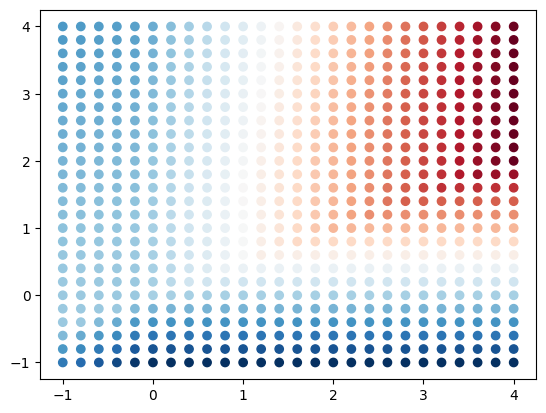

In [137]:
pred = model(torch.tensor(coords).to(torch.float32)).flatten().detach().numpy()
plt.scatter(coords[:, 0], coords[:, 1], c = pred, cmap='RdBu_r')
plt.show()